#### 1. Importing Libraries

In [6]:
%pip install librosa
%pip install --upgrade pip
%pip install --upgrade setuptools
%pip install resampy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder,OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


#### 2. Data Analysis and vizualization

In [7]:
df = pd.read_csv("voice.csv") #importing the csv file dataset using pandas library
df.head(10)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
5,0.132786,0.079557,0.119090,0.067958,0.209592,0.141634,1.932562,8.308895,0.963181,0.738307,...,0.132786,0.110132,0.017112,0.253968,0.298222,0.007812,2.726562,2.718750,0.125160,male
6,0.150762,0.074463,0.160106,0.092899,0.205718,0.112819,1.530643,5.987498,0.967573,0.762638,...,0.150762,0.105945,0.026230,0.266667,0.479620,0.007812,5.312500,5.304688,0.123992,male
7,0.160514,0.076767,0.144337,0.110532,0.231962,0.121430,1.397156,4.766611,0.959255,0.719858,...,0.160514,0.093052,0.017758,0.144144,0.301339,0.007812,0.539062,0.531250,0.283937,male
8,0.142239,0.078018,0.138587,0.088206,0.208587,0.120381,1.099746,4.070284,0.970723,0.770992,...,0.142239,0.096729,0.017957,0.250000,0.336476,0.007812,2.164062,2.156250,0.148272,male
9,0.134329,0.080350,0.121451,0.075580,0.201957,0.126377,1.190368,4.787310,0.975246,0.804505,...,0.134329,0.105881,0.019300,0.262295,0.340365,0.015625,4.695312,4.679688,0.089920,male


In [8]:
df #dataset

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,female
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,female
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,female
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,female


In [9]:
df.shape #shape command shows the rows and columns of the dataset

(3168, 21)

#### 3. Descriptive Analysis

In [10]:
df.info() #info command gives description about the type of data (64 bits float data or object type data or any other type) present in each column of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [11]:
df.head(5) #head() command gives the first five rows by default, the number of desired column can be changed by putting number inside the bracket

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [12]:
df['label'].unique()

array(['male', 'female'], dtype=object)

In [13]:
df.describe() #describe command gives a numerical analysis of all the numerical values for each column

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


#### 4. Univariate Analysis

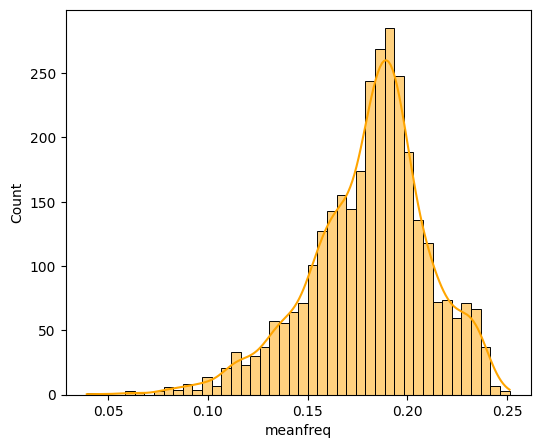

In [14]:
fig=plt.figure(figsize=(6,5))
sns.histplot(data=df,x='meanfreq',color='orange',kde=True)
plt.show()

In [15]:
#the histogram shows that the meanfreq of the data collected is mostly within the range of 0.1 to 0.25 units.

<Axes: xlabel='label', ylabel='count'>

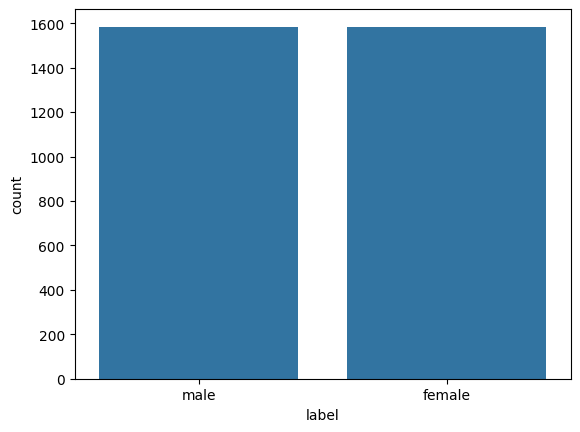

In [16]:
sns.countplot(x="label",data=df)

In [17]:
#the countplot gives an idea about the count of male and female voice data.

#### 5. Bivariate Analysis

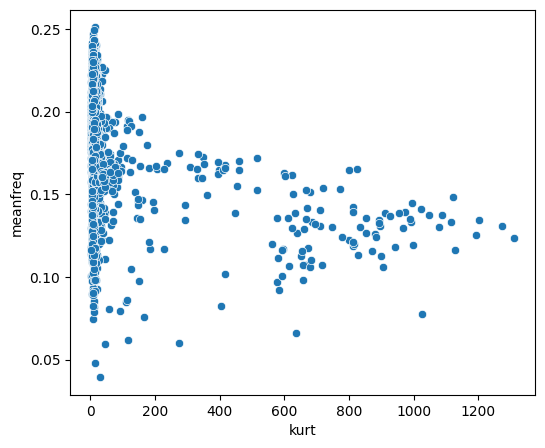

In [18]:
fig=plt.figure(figsize=(6,5))
sns.scatterplot(data=df,x='kurt',y='meanfreq')
plt.show()

In [19]:
#in the bivariate analysis, we can depict that the voice signals of kurtosis value ranging from 0 - 200 are with maximum meanfrequency value 0.2 or more than that
#whereas when kurtosis is increased to 600 - 1000 then maximum meanfrequency is decreased to 0.13 or till some extent of 0.17.

#### 6. Multivariate analysis

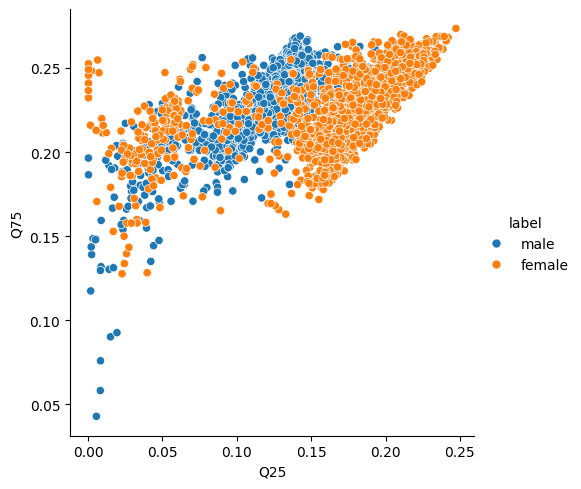

In [20]:
sns.relplot(x="Q25", y="Q75",data=df,hue="label")

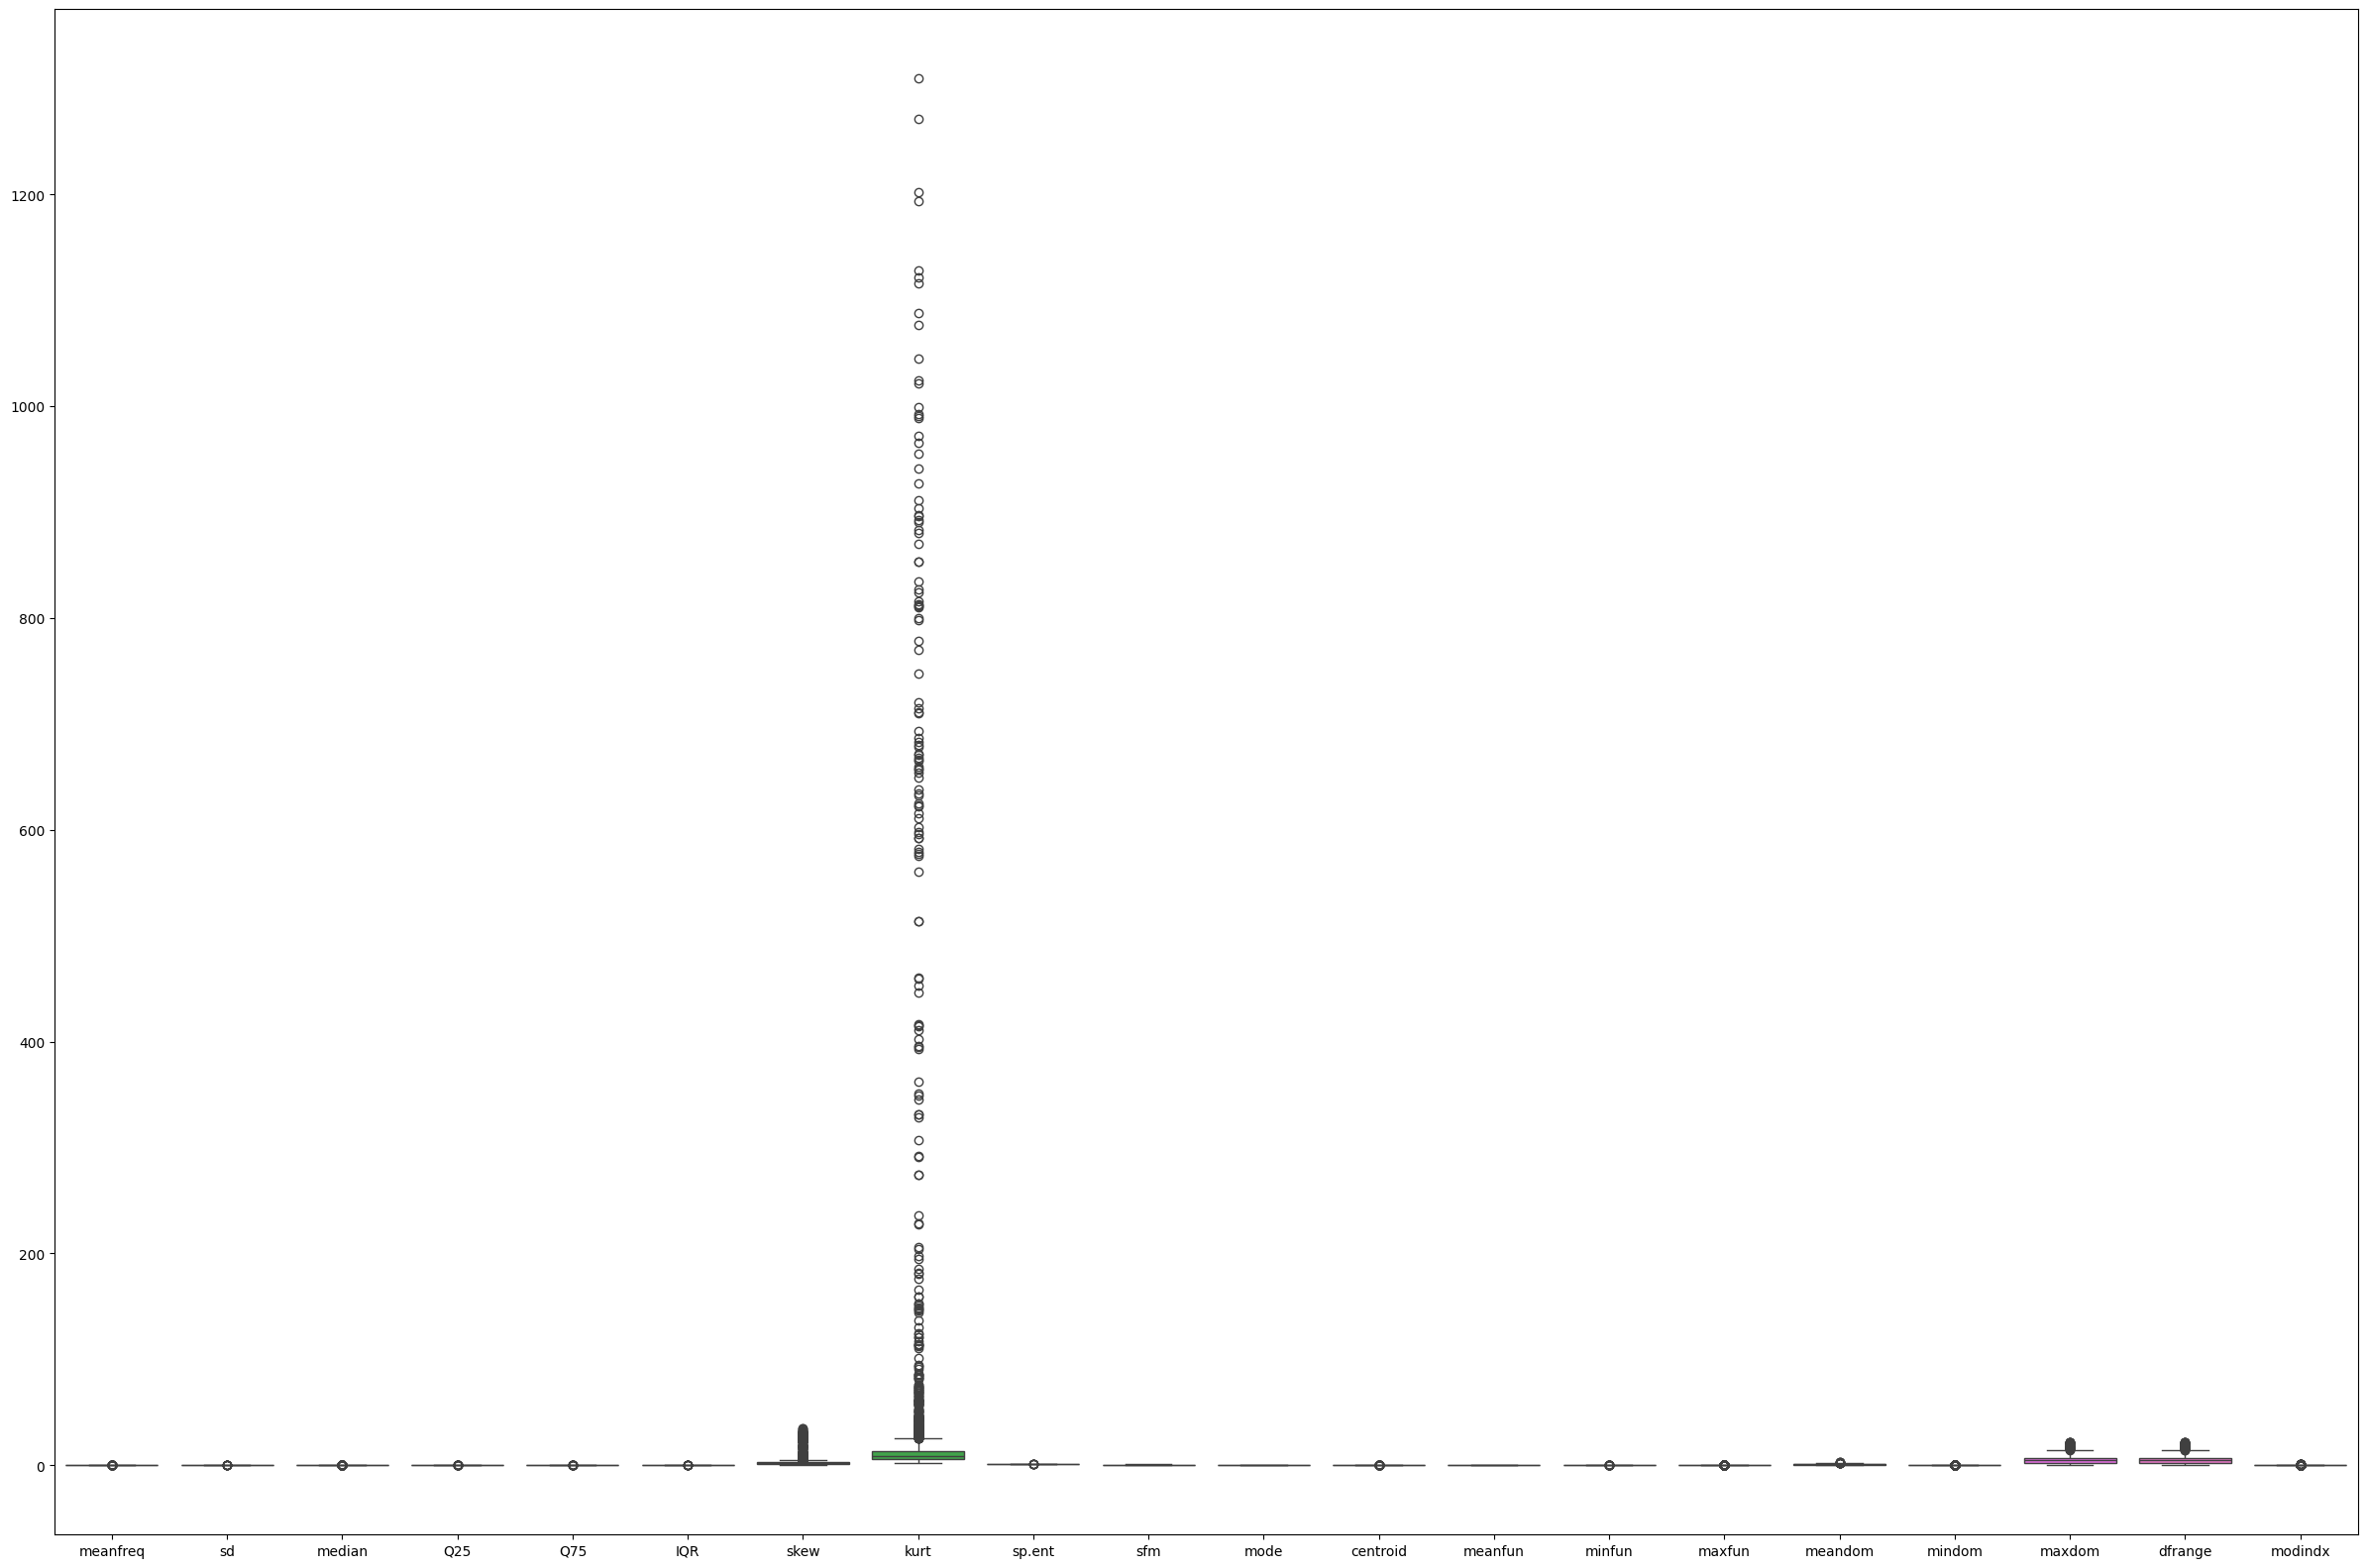

In [21]:
fig=plt.figure(figsize=(30,20))
sns.boxplot(df)
plt.show()

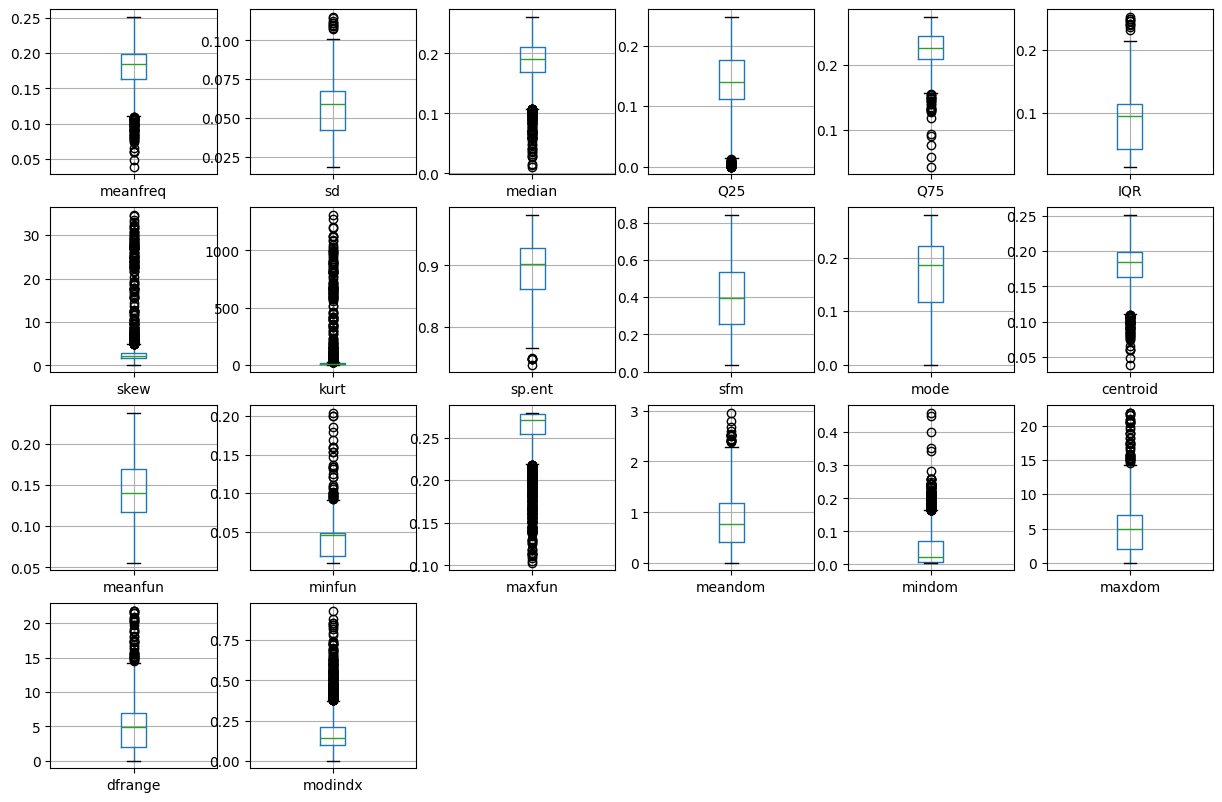

In [22]:
plt.figure(figsize=(15,15))
i=1
for col in df.iloc[:,:-1]:
    plt.subplot(6,6,i)
    df[[col]].boxplot()
    i+=1

In [23]:
#the above boxplot gives an idea about the range of values in the data and how much outlier is present in the dataset.

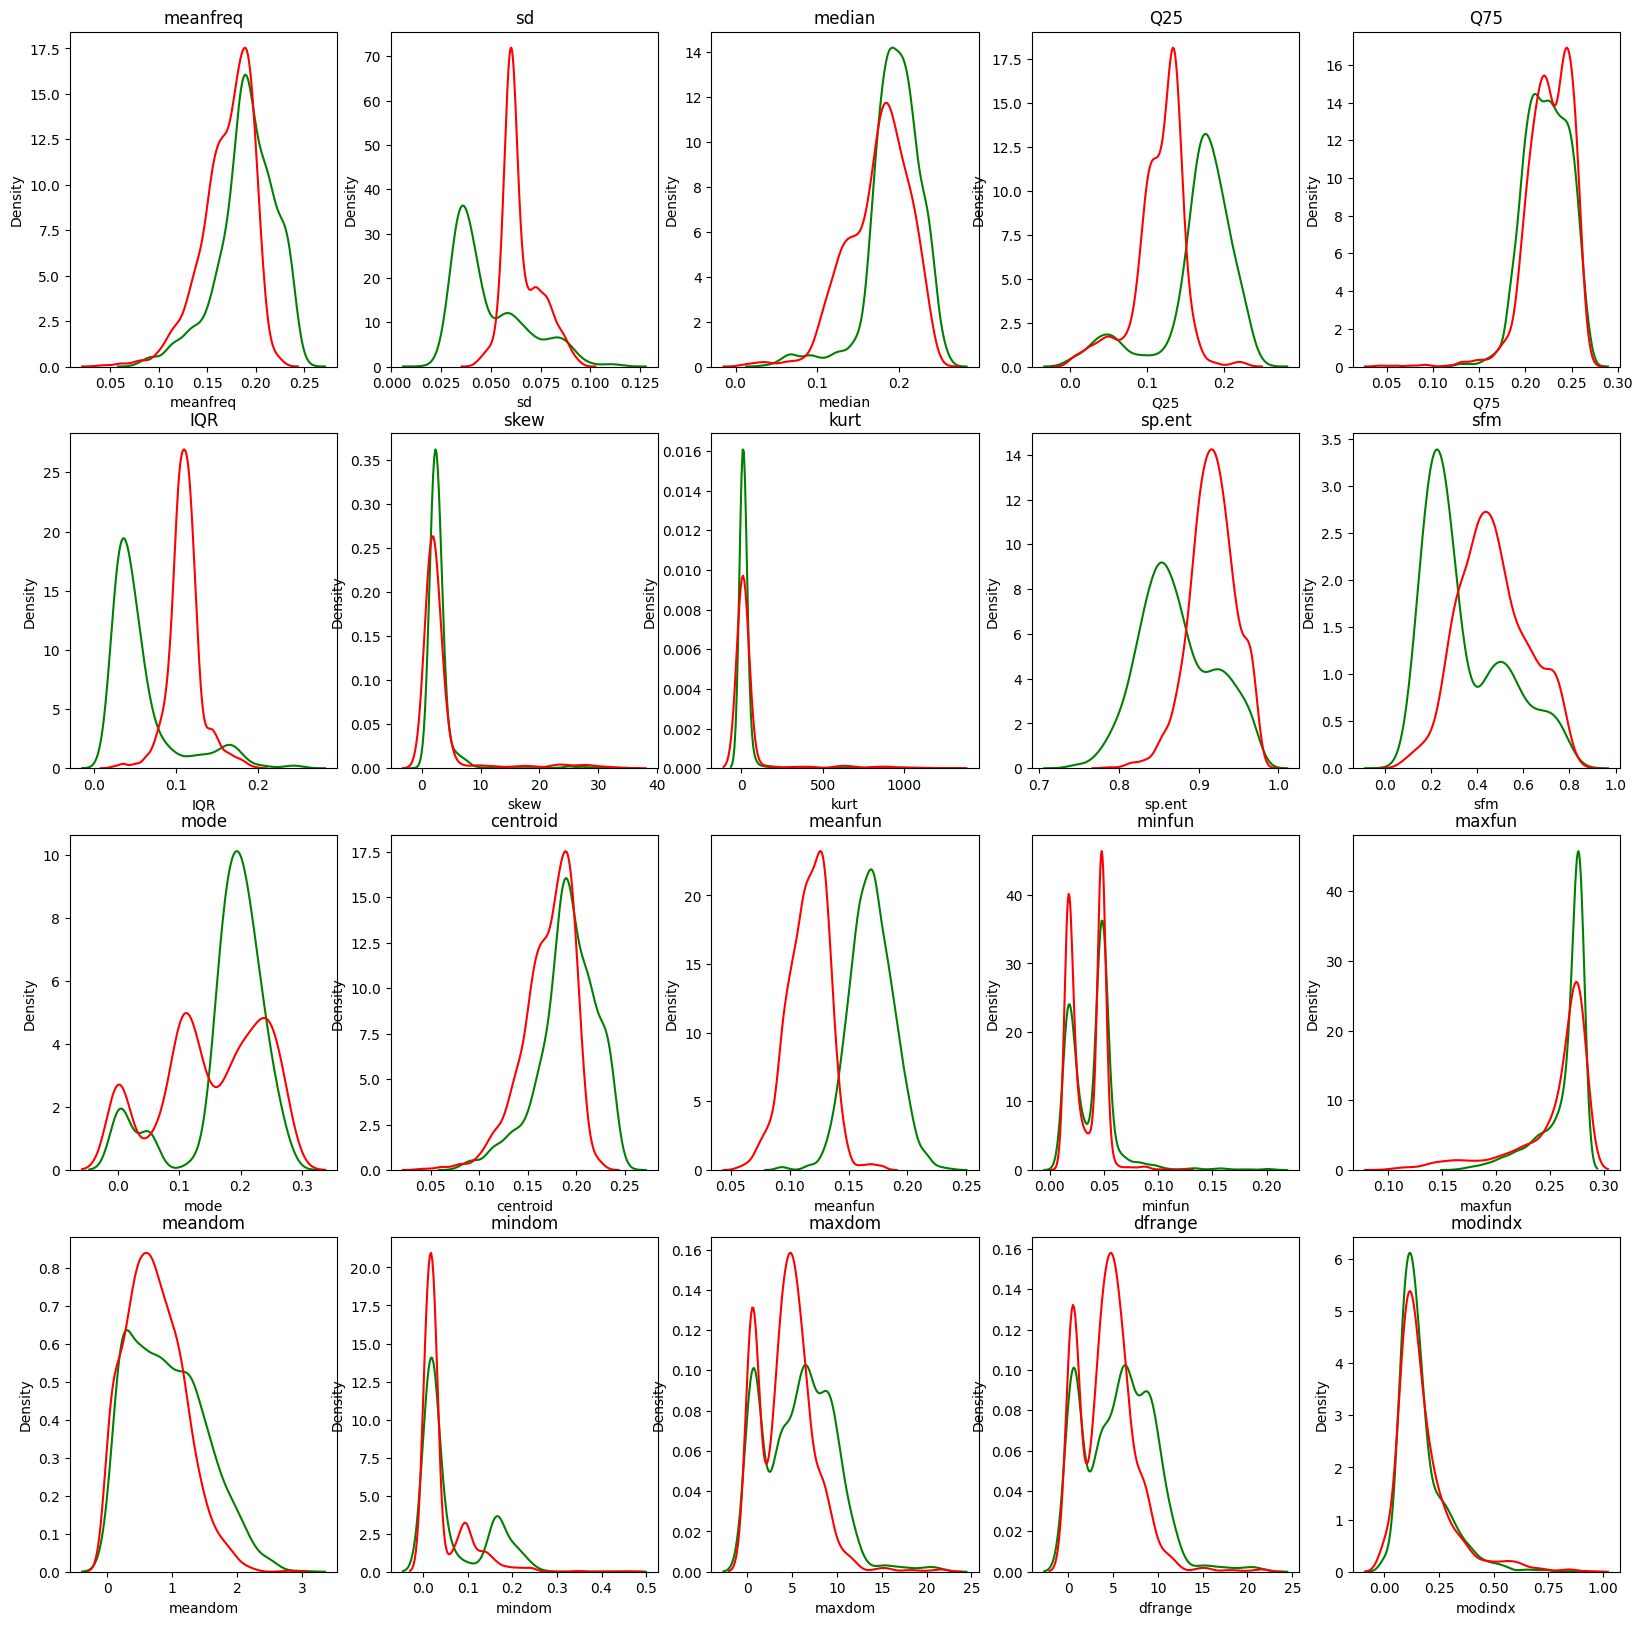

In [24]:
plt.subplots(4,5,figsize=(20,20))
for k in range(1,21):
    plt.subplot(4,5,k)
    plt.title(df.columns[k-1])
    sns.kdeplot(df.loc[df['label'] == 'female', df.columns[k-1]], color= 'green', label='F')
    sns.kdeplot(df.loc[df['label'] == 'male', df.columns[k-1]], color= 'red', label='M')

In [25]:
#the above graphs show the comparative study of the dataset's attributes for both male and female

#### 7. Data Pre-processing

**Outlier Detection**

In [26]:
#kurt

<Axes: ylabel='kurt'>

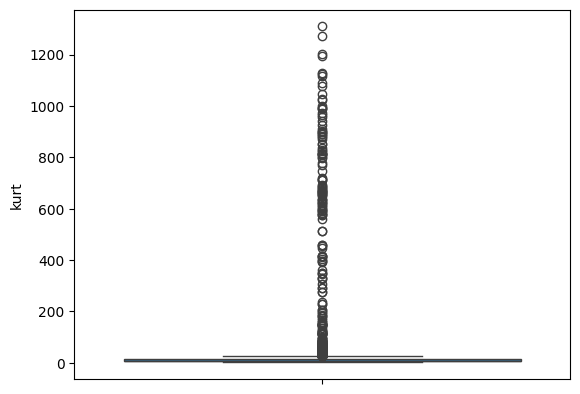

In [27]:
sns.boxplot(df['kurt'])

In [28]:
q1 = df['kurt'].quantile(0.25)
q3 = df['kurt'].quantile(0.75)
IQR=q3-q1
upper_limit=q3+1.5*IQR
lower_limit=q1-1.5*IQR
print(upper_limit)
print(lower_limit)

25.61794301571637
-6.299490840118888


<Axes: ylabel='kurt'>

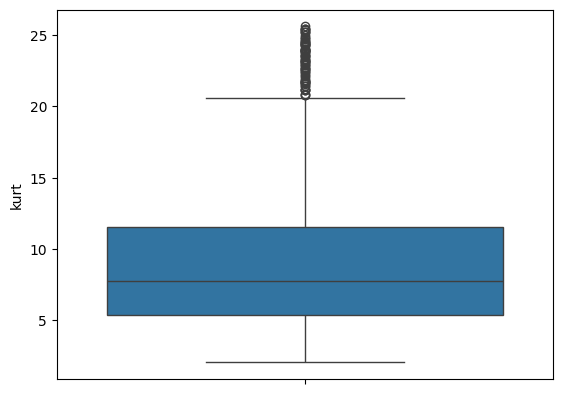

In [29]:
df = df[df['kurt']<upper_limit]
sns.boxplot(df['kurt'])

In [30]:
#maxdom

<Axes: ylabel='maxdom'>

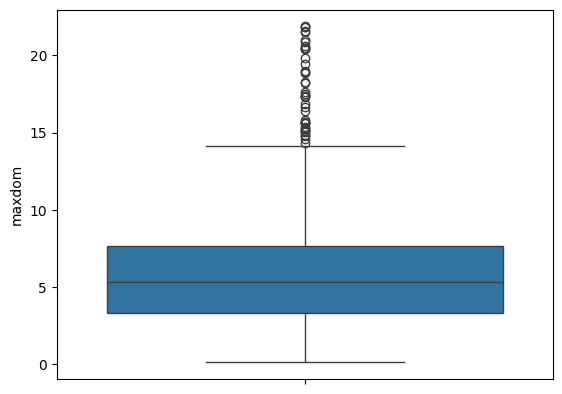

In [31]:
sns.boxplot(df['maxdom'])

In [32]:
q1 = df['maxdom'].quantile(0.25)
q3 = df['maxdom'].quantile(0.75)
IQR=q3-q1
upper_limit=q3+1.5*IQR
lower_limit=q1-1.5*IQR
print(upper_limit)
print(lower_limit)

14.1708984375
-3.1806640625


<Axes: ylabel='maxdom'>

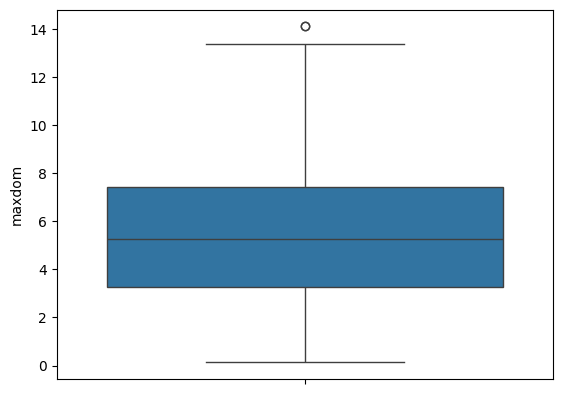

In [33]:
df = df[df['maxdom']<upper_limit]
sns.boxplot(df['maxdom'])

In [34]:
#meandom

<Axes: ylabel='meandom'>

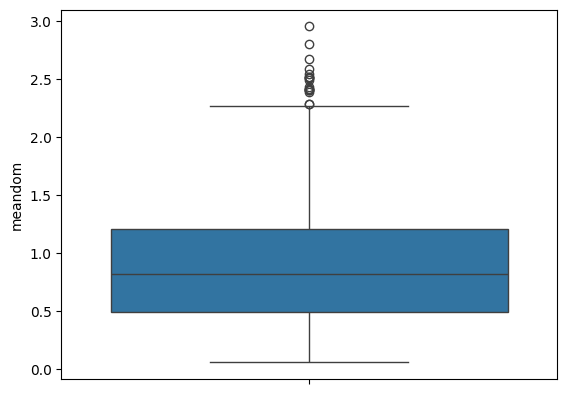

In [35]:
sns.boxplot(df['meandom'])

In [36]:
q1 = df['meandom'].quantile(0.25)
q3 = df['meandom'].quantile(0.75)
IQR=q3-q1
upper_limit=q3+1.5*IQR
lower_limit=q1-1.5*IQR
print(upper_limit)
print(lower_limit)

2.279893755305599
-0.5820809900254647


<Axes: ylabel='meandom'>

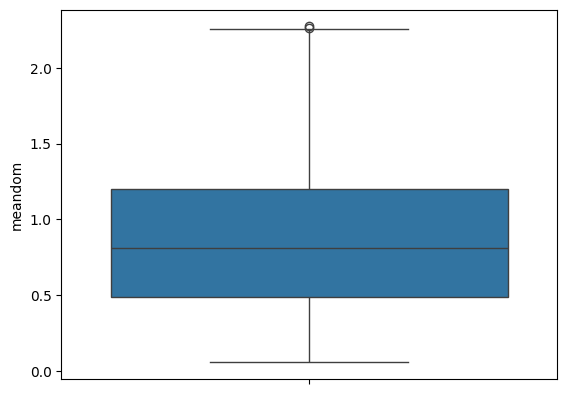

In [37]:
df = df[df['meandom']<upper_limit]
sns.boxplot(df['meandom'])

In [38]:
#mindom

<Axes: ylabel='mindom'>

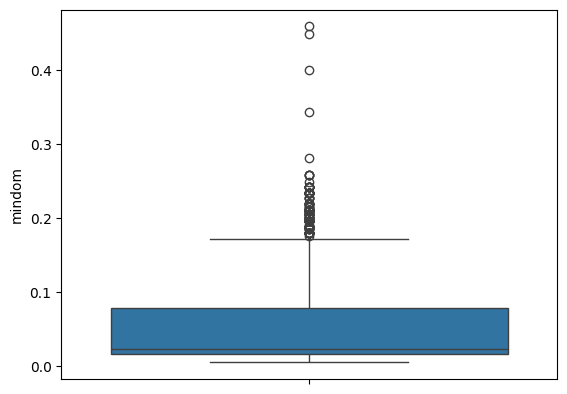

In [39]:
sns.boxplot(df['mindom'])

In [40]:
q1 = df['mindom'].quantile(0.25)
q3 = df['mindom'].quantile(0.75)
IQR=q3-q1
upper_limit=q3+1.5*IQR
lower_limit=q1-1.5*IQR
print(upper_limit)
print(lower_limit)

0.171875
-0.078125


<Axes: ylabel='mindom'>

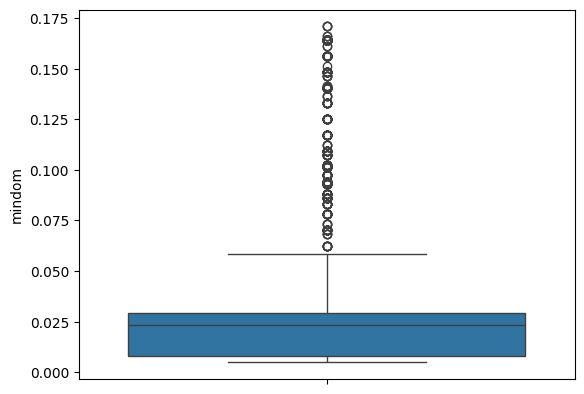

In [41]:
df = df[df['mindom']<upper_limit]
sns.boxplot(df['mindom'])

In [42]:
#modindx

<Axes: ylabel='modindx'>

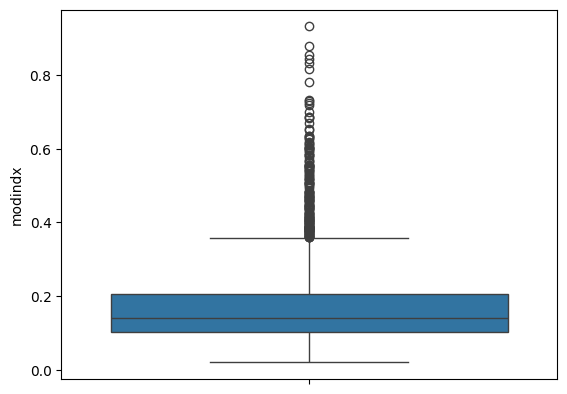

In [43]:
sns.boxplot(df['modindx'])

In [44]:
q1 = df['modindx'].quantile(0.25)
q3 = df['modindx'].quantile(0.75)
IQR=q3-q1
upper_limit=q3+1.5*IQR
lower_limit=q1-1.5*IQR
print(upper_limit)
print(lower_limit)

0.358318698652736
-0.051447757362466026


<Axes: ylabel='modindx'>

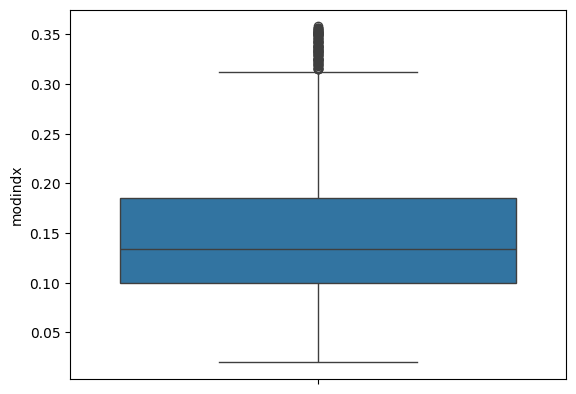

In [45]:
df = df[df['modindx']<upper_limit]
sns.boxplot(df['modindx'])

In [46]:
#meanfreq

<Axes: ylabel='meanfreq'>

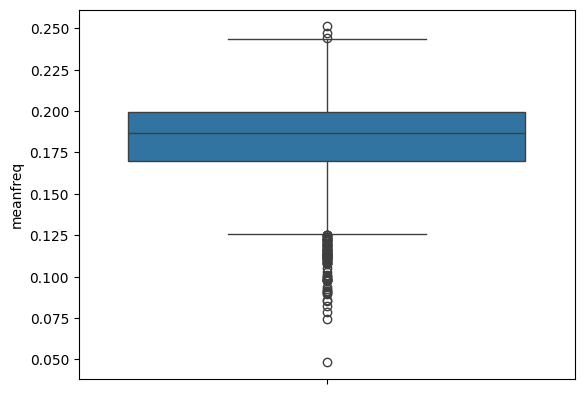

In [47]:
sns.boxplot(df['meanfreq'])

In [48]:
q1 = df['meanfreq'].quantile(0.25)
q3 = df['meanfreq'].quantile(0.75)
IQR=q3-q1
upper_limit=q3+1.5*IQR
lower_limit=q1-1.5*IQR
print(upper_limit)
print(lower_limit)

0.24411877286509415
0.12544410072336515


<Axes: ylabel='meanfreq'>

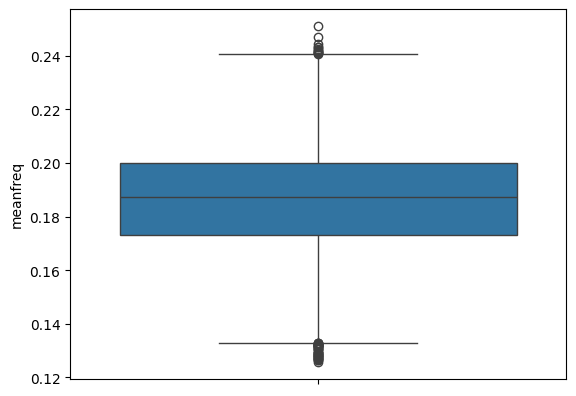

In [49]:
df = df[df['meanfreq']>lower_limit]
sns.boxplot(df['meanfreq'])

**Boxplot after outlier removal**

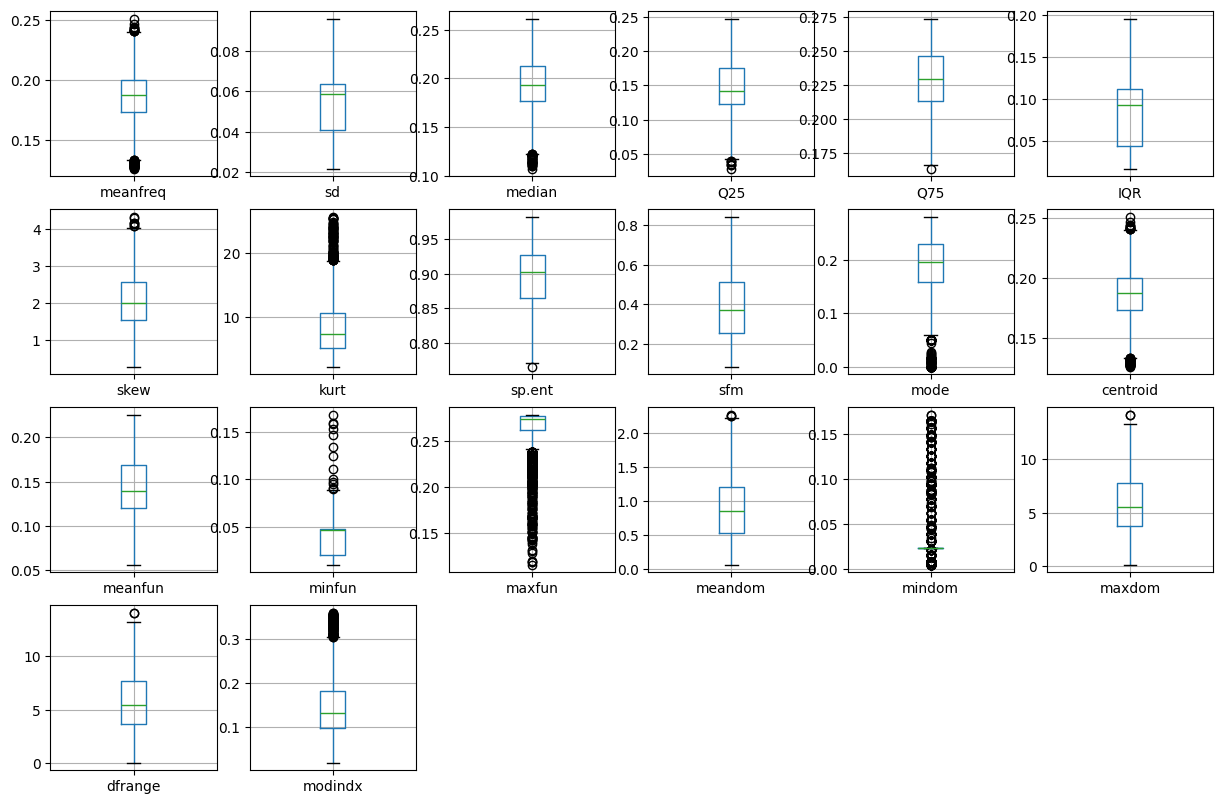

In [50]:
plt.figure(figsize=(15,15))
i=1
for col in df.iloc[:,:-1]:
    plt.subplot(6,6,i)
    df[[col]].boxplot()
    i+=1

In [51]:
df.shape

(2292, 21)

In [52]:
#Shape of the data has reduced due to the removal of outliers.

**Checking for null values**

In [53]:
df.isnull().any() #Checking if any null values are there or not

meanfreq    False
sd          False
median      False
Q25         False
Q75         False
IQR         False
skew        False
kurt        False
sp.ent      False
sfm         False
mode        False
centroid    False
meanfun     False
minfun      False
maxfun      False
meandom     False
mindom      False
maxdom      False
dfrange     False
modindx     False
label       False
dtype: bool

In [54]:
df.isnull().sum() #Checking the number of null values present

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

**Skewness Measurement**

In [55]:
df.iloc[:,:-1].skew()

meanfreq   -0.115514
sd          0.023828
median     -0.451013
Q25        -0.131292
Q75        -0.236446
IQR         0.064380
skew        0.451095
kurt        1.291360
sp.ent     -0.400872
sfm         0.475558
mode       -1.054007
centroid   -0.115514
meanfun     0.107445
minfun      0.874763
maxfun     -2.512841
meandom     0.430349
mindom      1.853433
maxdom      0.028377
dfrange     0.032113
modindx     1.047374
dtype: float64

**Label Encoding**

In [56]:
#LABEL ENCODING THE pdclass COLUMN
#Label encoding enables to give label based values for the columns of object datatype
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
df['label'] = lb_make.fit_transform(df['label'])
df.sample(3)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
2308,0.223532,0.041782,0.231398,0.197419,0.256344,0.058925,1.336086,3.824062,0.869303,0.211917,...,0.223532,0.179014,0.050526,0.279070,1.110224,0.023438,6.820312,6.796875,0.094745,0
1772,0.171669,0.049640,0.177821,0.160741,0.196427,0.035686,3.358289,16.059178,0.877704,0.438459,...,0.171669,0.159961,0.017978,0.262295,0.198893,0.007812,0.554688,0.546875,0.079503,0
1767,0.182025,0.036891,0.179459,0.167568,0.194054,0.026486,2.819241,10.634506,0.832225,0.286990,...,0.182025,0.145491,0.029851,0.202532,0.640024,0.164062,6.117188,5.953125,0.084427,0


In [57]:
df.label.value_counts()

label
1    1192
0    1100
Name: count, dtype: int64

**Correlation calculation and plotting**

In [58]:
df.corr()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
meanfreq,1.000000,-0.698580,0.890370,0.888243,0.662072,-0.584415,0.091220,-0.047027,-0.753373,-0.827146,...,1.000000,0.501529,0.371330,0.330215,0.458265,0.039925,0.460124,0.459051,-0.322767,-0.379813
sd,-0.698580,1.000000,-0.476792,-0.822092,0.003648,0.865179,-0.325486,-0.163598,0.868409,0.870909,...,-0.698580,-0.489077,-0.281074,-0.142871,-0.372283,-0.255339,-0.419990,-0.415686,0.283195,0.537032
median,0.890370,-0.476792,1.000000,0.697625,0.648657,-0.391308,0.013664,-0.109172,-0.585227,-0.660070,...,0.890370,0.447684,0.340451,0.312405,0.382363,0.019582,0.372196,0.371521,-0.262108,-0.299453
Q25,0.888243,-0.822092,0.697625,1.000000,0.343420,-0.869408,0.319019,0.168203,-0.818833,-0.799425,...,0.888243,0.607876,0.250314,0.247064,0.370320,0.111650,0.403533,0.401428,-0.270605,-0.601025
Q75,0.662072,0.003648,0.648657,0.343420,1.000000,0.165473,-0.288981,-0.309076,-0.168649,-0.316801,...,0.662072,0.110749,0.263427,0.295104,0.290380,-0.185644,0.240218,0.242794,-0.185433,0.131166
IQR,-0.584415,0.865179,-0.391308,-0.869408,0.165473,1.000000,-0.487025,-0.339228,0.771114,0.672793,...,-0.584415,-0.580053,-0.124263,-0.104185,-0.236099,-0.214907,-0.297364,-0.293798,0.186602,0.700128
skew,0.091220,-0.325486,0.013664,0.319019,-0.288981,-0.487025,1.000000,0.937959,-0.503299,-0.258700,...,0.091220,0.326143,-0.051537,-0.058661,-0.058521,0.134451,-0.002677,-0.004716,0.033728,-0.406896
kurt,-0.047027,-0.163598,-0.109172,0.168203,-0.309076,-0.339228,0.937959,1.000000,-0.309323,-0.094965,...,-0.047027,0.213730,-0.118181,-0.091685,-0.130566,0.089933,-0.086329,-0.087607,0.092897,-0.301726
sp.ent,-0.753373,0.868409,-0.585227,-0.818833,-0.168649,0.771114,-0.503299,-0.309323,1.000000,0.892985,...,-0.753373,-0.590269,-0.338045,-0.180717,-0.344052,-0.197067,-0.403479,-0.400077,0.287379,0.545081
sfm,-0.827146,0.870909,-0.660070,-0.799425,-0.316801,0.672793,-0.258700,-0.094965,0.892985,1.000000,...,-0.827146,-0.435060,-0.352587,-0.236932,-0.393622,-0.191255,-0.424237,-0.420902,0.327766,0.376879


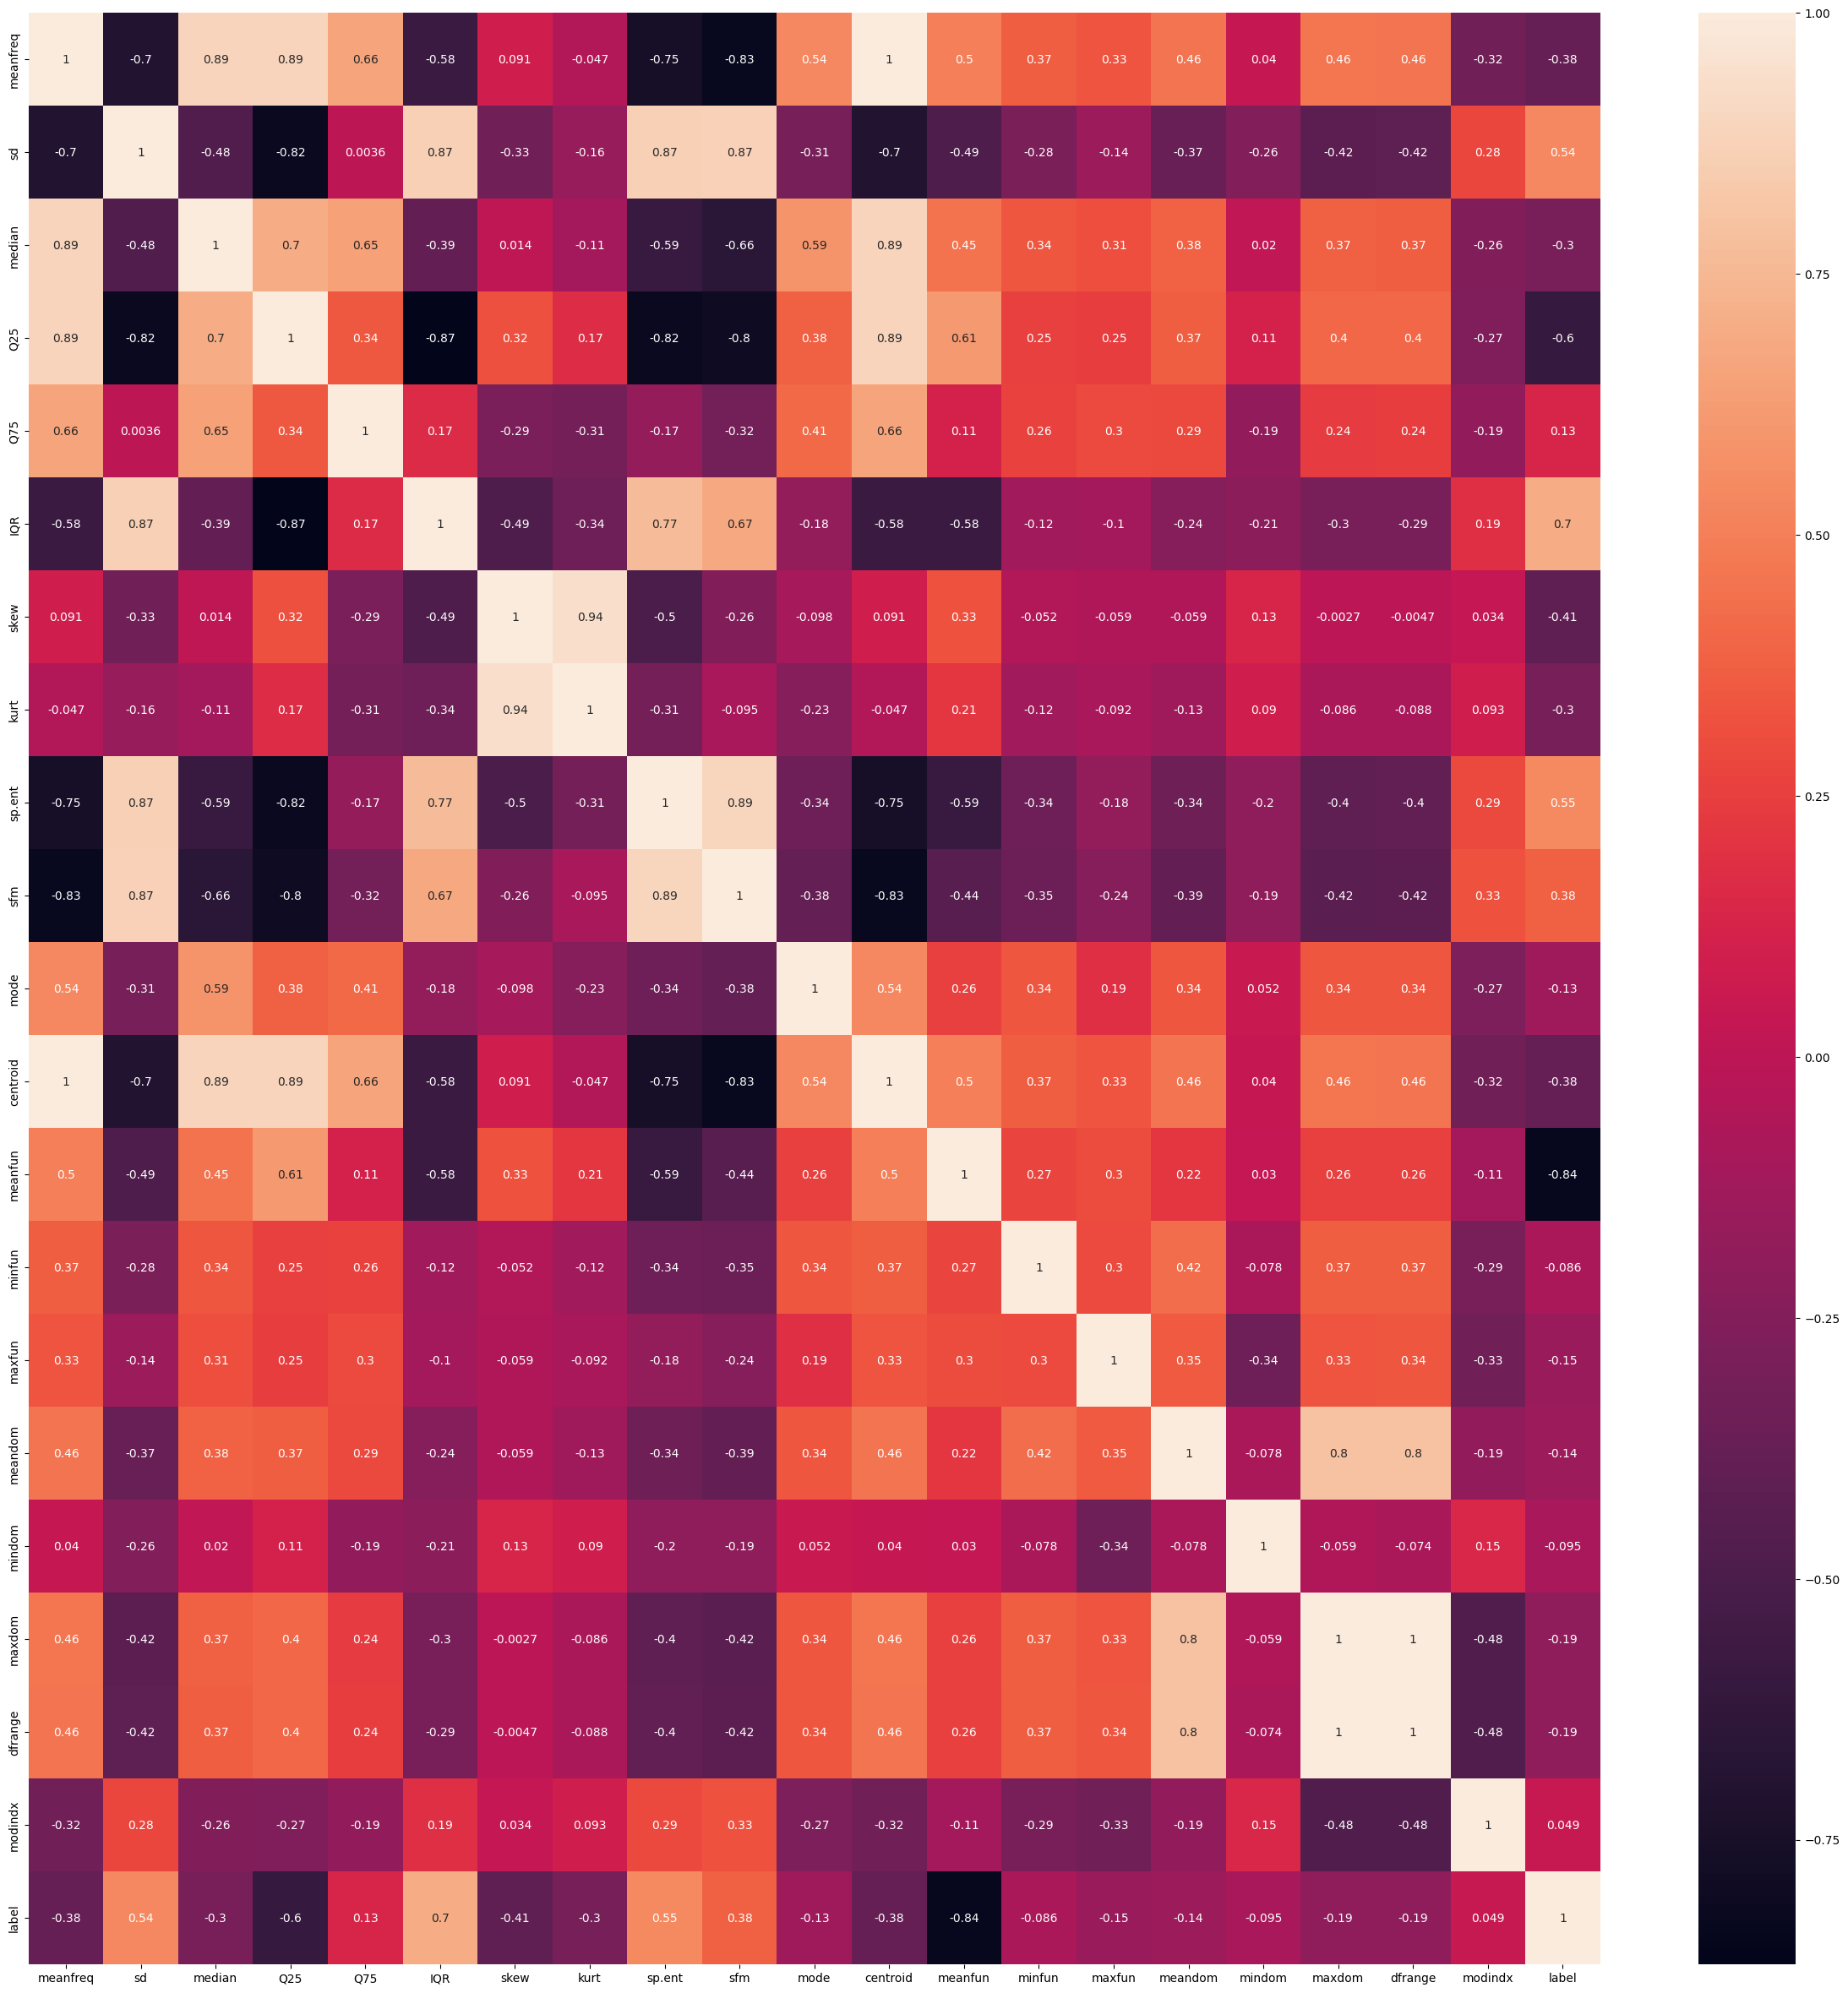

In [59]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [60]:
def target_coeff(dataframe,target):
    data = dataframe.corr()[target].sort_values(ascending=False)
    indices = data.index
    labels = []
    corr = []
    for i in range(1, len(indices)):
        labels.append(indices[i])
        corr.append(data[i])
    plt.figure(figsize=(10,8),dpi=100)    
    sns.barplot(x=corr, y=labels, palette="RdBu")
    plt.title('Correlation Coefficient for : {} column'.format(target.upper()))
    plt.show()

C:\Users\benaz\AppData\Local\Temp\ipykernel_9556\1831792397.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  corr.append(data[i])
C:\Users\benaz\AppData\Local\Temp\ipykernel_9556\1831792397.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr, y=labels, palette="RdBu")


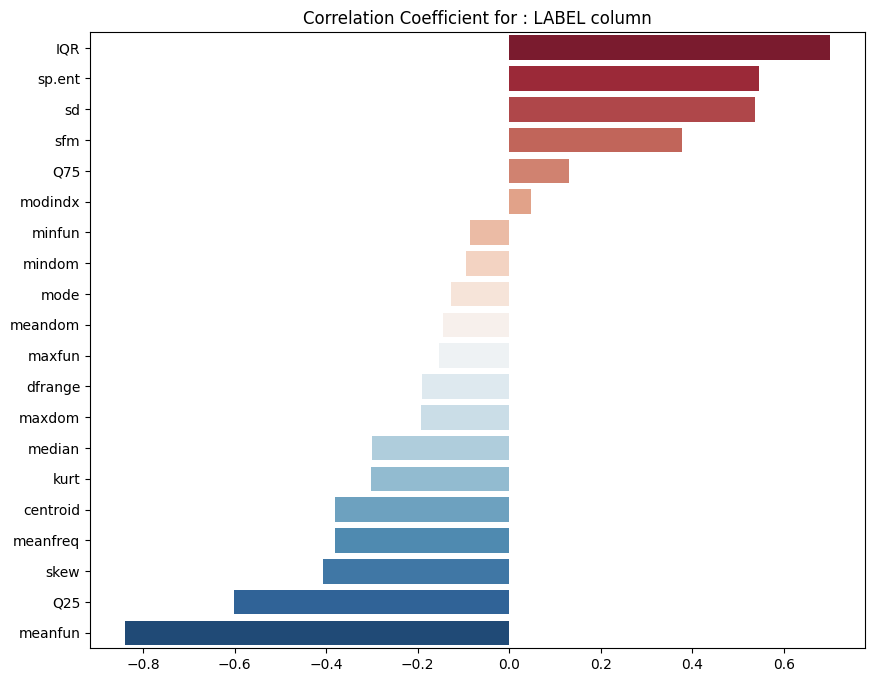

In [61]:
target_coeff(df,'label')

**Spliting independent and dependent variables**

In [62]:
#INDEPENDENT VARIABLES
x=df.iloc[:,0:20] ##0-first column, 21st-last column, excludes the label in the 22nd column
x.head() ##first 5 rows display

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274
5,0.132786,0.079557,0.119090,0.067958,0.209592,0.141634,1.932562,8.308895,0.963181,0.738307,0.112555,0.132786,0.110132,0.017112,0.253968,0.298222,0.007812,2.726562,2.718750,0.125160
6,0.150762,0.074463,0.160106,0.092899,0.205718,0.112819,1.530643,5.987498,0.967573,0.762638,0.086197,0.150762,0.105945,0.026230,0.266667,0.479620,0.007812,5.312500,5.304688,0.123992
7,0.160514,0.076767,0.144337,0.110532,0.231962,0.121430,1.397156,4.766611,0.959255,0.719858,0.128324,0.160514,0.093052,0.017758,0.144144,0.301339,0.007812,0.539062,0.531250,0.283937


In [63]:
type(x) #type() command gives the idea about the data-structure of a given variable

pandas.core.frame.DataFrame

In [64]:
x.shape

(2292, 20)

In [65]:
#DEPENDENT VARIABLES
y=df.label
y.head()

3    1
4    1
5    1
6    1
7    1
Name: label, dtype: int32

In [66]:
type(y)

pandas.core.series.Series

In [67]:
y.shape

(2292,)

**Feature Scaling**

**Spliting training and testing Dataset**

In [68]:
#Training and Testing dataset splitting is done.
#Training data is 80% of the original data which will help to run the model and also prepare the model to work with the testing data.
#Testing data is 20% of the original data which will help the model to work with real-time data in future.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1833, 20), (459, 20), (1833,), (459,))

In [69]:
x_train #Trainig dataset of independent variable set x

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
518,0.141263,0.072699,0.136798,0.087878,0.192834,0.104956,2.528384,13.098922,0.963083,0.727169,0.094994,0.141263,0.095860,0.015857,0.266667,0.414363,0.007812,2.585938,2.578125,0.144192
1202,0.193778,0.059249,0.184405,0.136916,0.250396,0.113480,1.561752,5.199408,0.901081,0.318025,0.241454,0.193778,0.136480,0.046967,0.277457,1.090600,0.023438,4.851562,4.828125,0.117123
1161,0.193200,0.061011,0.212064,0.133995,0.251099,0.117105,1.486464,4.675800,0.903538,0.361605,0.253727,0.193200,0.126353,0.046921,0.277457,1.542656,0.023438,9.070312,9.046875,0.112781
947,0.195848,0.059568,0.223203,0.129537,0.248612,0.119075,2.043298,7.191449,0.882148,0.275661,0.243132,0.195848,0.124312,0.048096,0.265193,0.553571,0.023438,3.023438,3.000000,0.090039
223,0.188637,0.064048,0.210291,0.125738,0.239979,0.114241,1.444444,4.918714,0.925363,0.445586,0.115405,0.188637,0.116298,0.021108,0.250000,0.652344,0.007812,6.015625,6.007812,0.125367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,0.220023,0.047351,0.229451,0.177912,0.265133,0.087221,1.791341,6.022468,0.867843,0.225244,0.270584,0.220023,0.161509,0.053097,0.277457,1.773633,0.023438,7.734375,7.710938,0.113803
1421,0.177191,0.061073,0.181369,0.131820,0.219699,0.087880,1.835673,6.782405,0.918167,0.434457,0.183706,0.177191,0.113289,0.047151,0.269663,0.675586,0.023438,3.210938,3.187500,0.192690
1458,0.182041,0.062543,0.175460,0.146041,0.243227,0.097186,2.286531,9.555037,0.900279,0.357794,0.164953,0.182041,0.101712,0.047904,0.266667,0.512019,0.023438,3.375000,3.351562,0.092269
1743,0.182180,0.031834,0.180857,0.167143,0.200286,0.033143,2.218499,7.052427,0.831152,0.205100,0.174000,0.182180,0.163618,0.037647,0.205128,0.765625,0.164062,6.242188,6.078125,0.160308


In [70]:
y_test #Testing dataset of dependent variable set y which will be needed during accuracy measurement

2500    0
1873    0
1764    0
2381    0
1887    0
       ..
402     1
1178    1
1375    1
2651    0
508     1
Name: label, Length: 459, dtype: int32

In [71]:
acc=[]
model=[]

#### 8. Model Building

#### ANN

In [72]:
import tensorflow as tf
print(tf.__version__)

2.16.1


In [73]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics
from tensorflow.keras.layers import Input

In [74]:
### No of classes
num_labels=y.shape[0]

In [75]:
ANNmodel = Sequential()

# First layer
ANNmodel.add(Dense(128, input_shape=(20,), activation='relu'))  # Increased number of neurons
ANNmodel.add(Dropout(0.2))  # Reduced dropout rate

# Second layer
ANNmodel.add(Dense(256, activation='relu'))  # Increased number of neurons
ANNmodel.add(Dropout(0.3))  # Adjusted dropout rate

# Third layer
ANNmodel.add(Dense(128, activation='relu'))  # Reduced number of neurons
ANNmodel.add(Dropout(0.2))  # Reduced dropout rate

# Final layer
ANNmodel.add(Dense(num_labels, activation='softmax'))


c:\Users\benaz\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [76]:
ANNmodel.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         2,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2292)           │       295,668 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 364,276 (1.39 MB)

 Trainable params: 364,276 (1.39 MB)

 Non-trainable params: 0 (0.00 B)

In [77]:
ANNmodel.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
ANNmodel.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [78]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from datetime import datetime 

num_epochs = 100  # Increased number of epochs
num_batch_size = 64  # Adjusted batch size

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.keras', 
                               verbose=1, save_best_only=True)

early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=1)  # Early stopping callback

start = datetime.now()

ANNmodel.fit(x_train, y_train, 
              batch_size=num_batch_size, 
              epochs=num_epochs, 
              validation_split=0.2, 
              callbacks=[checkpointer, early_stopping],  # Added early stopping callback
              verbose=1)
duration = datetime.now() - start
print("Training completed in time: ", duration)



Epoch 1/100


19/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2482 - loss: 6.2533  
Epoch 1: val_loss improved from inf to 0.78784, saving model to saved_models/audio_classification.keras
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.2789 - loss: 5.7640 - val_accuracy: 0.5041 - val_loss: 0.7878
Epoch 2/100
13/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4880 - loss: 0.9244 
Epoch 2: val_loss improved from 0.78784 to 0.70603, saving model to saved_models/audio_classification.keras
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4963 - loss: 0.9056 - val_accuracy: 0.5232 - val_loss: 0.7060
Epoch 3/100
12/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5068 - loss: 0.7933 
Epoch 3: val_loss improved from 0.70603 to 0.67437, saving model to saved_models/audio_classification.keras
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5178 - loss: 0.7809 - val_accuracy: 0.5858 - val_loss: 0.6744
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5053 - loss: 0.7488
Ep

In [79]:
#training accuracy = 93.79%, validation accuracy = 94.28%:you can expect your model to perform with ~92% accuracy on new data.

In [101]:
#validation accuracy
test_accuracy=ANNmodel.evaluate(x_test,y_test,verbose=0)
print(test_accuracy[1])

0.9172113537788391


In [81]:
ANNmodel.predict(x_test)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


array([[9.6561563e-01, 3.4349173e-02, 4.1442473e-08, ..., 1.6886707e-08,
        2.1498270e-08, 2.8943322e-08],
       [2.3654577e-01, 7.6339889e-01, 4.8911428e-08, ..., 2.4436913e-08,
        3.7300524e-08, 3.9073470e-08],
       [9.7601593e-01, 2.3983521e-02, 9.6047115e-10, ..., 3.0785111e-10,
        3.9559406e-10, 6.0069122e-10],
       ...,
       [1.5096789e-03, 9.9849033e-01, 3.4978537e-11, ..., 1.7655131e-11,
        4.2286757e-11, 3.1900482e-11],
       [9.6842885e-01, 3.1554598e-02, 1.9816667e-08, ..., 7.5430506e-09,
        1.0304976e-08, 1.3673350e-08],
       [3.2506321e-02, 9.6749371e-01, 2.7323348e-14, ..., 1.0821625e-14,
        2.2400593e-14, 1.4224406e-14]], dtype=float32)

In [82]:
y_pred=ANNmodel.predict(x_test)
y_pred

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


array([[9.6561563e-01, 3.4349173e-02, 4.1442473e-08, ..., 1.6886707e-08,
        2.1498270e-08, 2.8943322e-08],
       [2.3654577e-01, 7.6339889e-01, 4.8911428e-08, ..., 2.4436913e-08,
        3.7300524e-08, 3.9073470e-08],
       [9.7601593e-01, 2.3983521e-02, 9.6047115e-10, ..., 3.0785111e-10,
        3.9559406e-10, 6.0069122e-10],
       ...,
       [1.5096789e-03, 9.9849033e-01, 3.4978537e-11, ..., 1.7655131e-11,
        4.2286757e-11, 3.1900482e-11],
       [9.6842885e-01, 3.1554598e-02, 1.9816667e-08, ..., 7.5430506e-09,
        1.0304976e-08, 1.3673350e-08],
       [3.2506321e-02, 9.6749371e-01, 2.7323348e-14, ..., 1.0821625e-14,
        2.2400593e-14, 1.4224406e-14]], dtype=float32)

In [113]:
data_dict = {
    'meanfreq': [2474.127023919006], 'sd': [2194.621448232875], 'median': [0.0], 'Q25': [-0.04960154742002487], 'Q75': [0.03940417990088463], 'IQR': [0.0890057273209095], 'skew': [2.6191388679266474], 'kurt': [7.055743334716519], 'sp.ent': [0.041512117], 'sfm': [0.041512117], 'mode': [0.0], 'centroid': [2474.127023919006], 'meanfun': [-0.14999999999999997], 'minfun': [-0.14999999999999997], 'maxfun': [-0.14999999999999997], 'meandom': [0.06314910571901232], 'mindom': [-1.5017708637785386e-16], 'maxdom': [1.0], 'dfrange': [1.0000000000000002], 'modindx': [4159.272927135678]
}
data = pd.DataFrame(data_dict)
prediction=ANNmodel.predict(data)
# Ensure prediction values are integer indices
prediction_indices = np.argmax(prediction, axis=1)

# Inverse transform the integer indices to labels
inverse_labels = lb_make.inverse_transform(prediction_indices)

# Print the inverse transformed labels
print(inverse_labels)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
['female']


**Model used: Decision Tree Classfier**

In [84]:
DT_model=DecisionTreeClassifier()
DT_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [85]:
y_pred=DT_model.predict(x_test)
y_pred
#the model predicted the result with the input of testing data of independent variables (x_test) since it has been trained previously with the training dataset

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,

In [86]:
y_test #original result of the independent variables of the testing data of dependent variables.

2500    0
1873    0
1764    0
2381    0
1887    0
       ..
402     1
1178    1
1375    1
2651    0
508     1
Name: label, Length: 459, dtype: int32

In [87]:
x=accuracy_score(y_test,y_pred)
print(x)
acc.append(x)
model.append('Decision Tree Classifier')

0.9629629629629629


In [88]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       220
           1       0.96      0.97      0.96       239

    accuracy                           0.96       459
   macro avg       0.96      0.96      0.96       459
weighted avg       0.96      0.96      0.96       459



**Model used: Random Forest Classifier**

In [89]:
RF_model = RandomForestClassifier(n_estimators=100,random_state=42)
RF_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [90]:
y_pred=RF_model.predict(x_test)
y_pred
#the model predicted the result with the input of testing data of independent variables (x_test) since it has been trained previously with the training dataset

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,

In [91]:
y_test #original result of the independent variables of the testing data of dependent variables.

2500    0
1873    0
1764    0
2381    0
1887    0
       ..
402     1
1178    1
1375    1
2651    0
508     1
Name: label, Length: 459, dtype: int32

In [92]:
x=accuracy_score(y_test,y_pred)
print(x)
acc.append(x)
model.append('Random Forest Classifier')

0.9738562091503268


In [93]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       220
           1       0.97      0.98      0.97       239

    accuracy                           0.97       459
   macro avg       0.97      0.97      0.97       459
weighted avg       0.97      0.97      0.97       459



In [94]:
LR_model=LogisticRegression()
LR_model.fit(x_train,y_train)

c:\Users\benaz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [95]:
y_pred=LR_model.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,

In [96]:
y_test

2500    0
1873    0
1764    0
2381    0
1887    0
       ..
402     1
1178    1
1375    1
2651    0
508     1
Name: label, Length: 459, dtype: int32

In [97]:
x=accuracy_score(y_test,y_pred)
print(x)
acc.append(x)
model.append('Logistic Regression')

0.8976034858387799


C:\Users\benaz\AppData\Local\Temp\ipykernel_9556\2464031616.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = acc,y = model,palette='dark')


<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

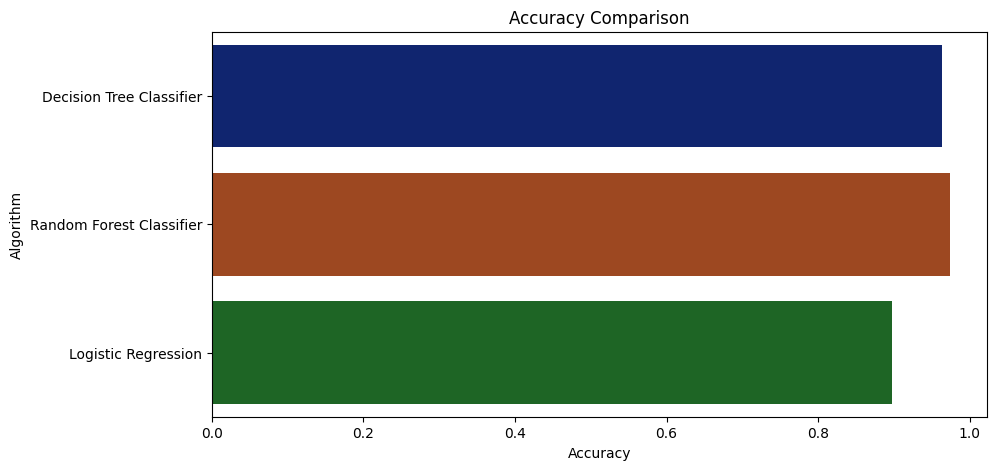

In [98]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [99]:
data_dict = {
    'meanfreq': [2192.3291053431626], 'sd': [1220.3091879537865], 'median': [-0.0004272461], 'Q25': [-0.01605224609375], 'Q75': [0.008514404296875], 'IQR': [0.024566650390625], 'skew': [1.4053504430510502], 'kurt': [1.3383442870536895], 'sp.ent': [0.056253217], 'sfm': [0.056253217], 'mode': [0.0], 'centroid': [2192.3291053431626], 'meanfun': [-0.38], 'minfun': [-0.38], 'maxfun': [-0.38], 'meandom': [0.10655758482835208], 'mindom': [-1.5849987772704835e-16], 'maxdom': [1.0], 'dfrange': [1.0000000000000002], 'modindx': [4372.310450819672]    
}
data = pd.DataFrame(data_dict)
prediction=RF_model.predict(data)
print(prediction)
lb_make.inverse_transform(prediction)

[1]


array(['male'], dtype=object)

In [100]:
import pickle

model = DT_model

pkl_file_path = 'model.pkl'

with open(pkl_file_path, 'wb') as file:
    pickle.dump(model, file)